In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

%matplotlib notebook

# Reading Data

In [151]:
# reading datafile
data = pd.read_csv('../data/_slash_cyberpod_sim_ros_slash_learning_data_throttled.csv')

# removing irrelevant entries
data = data[data['status']==2]
data = data.reset_index(drop=True)

# converting strings to arrays
data['image'] = data['image'].str.replace('[','').str.replace(']','')
data['image'] = data['image'].apply(np.fromstring, sep=', ')

data['stateVec'] = data['stateVec'].str.replace('[','').str.replace(']','')
data['stateVec'] = data['stateVec'].apply(np.fromstring, sep=', ')

# reshaping image data
data['image'] = data['image'].apply(np.reshape, newshape=(250,525,3 ))
data['image'] = data['image'].apply(lambda x: x.astype(int))

In [185]:
state_labels = ['$x$', '$y$', '$\\theta_z$', '$\\dot{x}$', '$\\dot{\\theta}_z$', '$\\theta_y$', '$\\dot{\\theta}_y$']
states = np.vstack(data['stateVec'])

# Plotting Data

In [153]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.slices = len(X)
        self.ind = 0

        self.im = ax.imshow(self.X[self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind - 1) % self.slices
        else:
            self.ind = (self.ind + 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

<IPython.core.display.Javascript object>


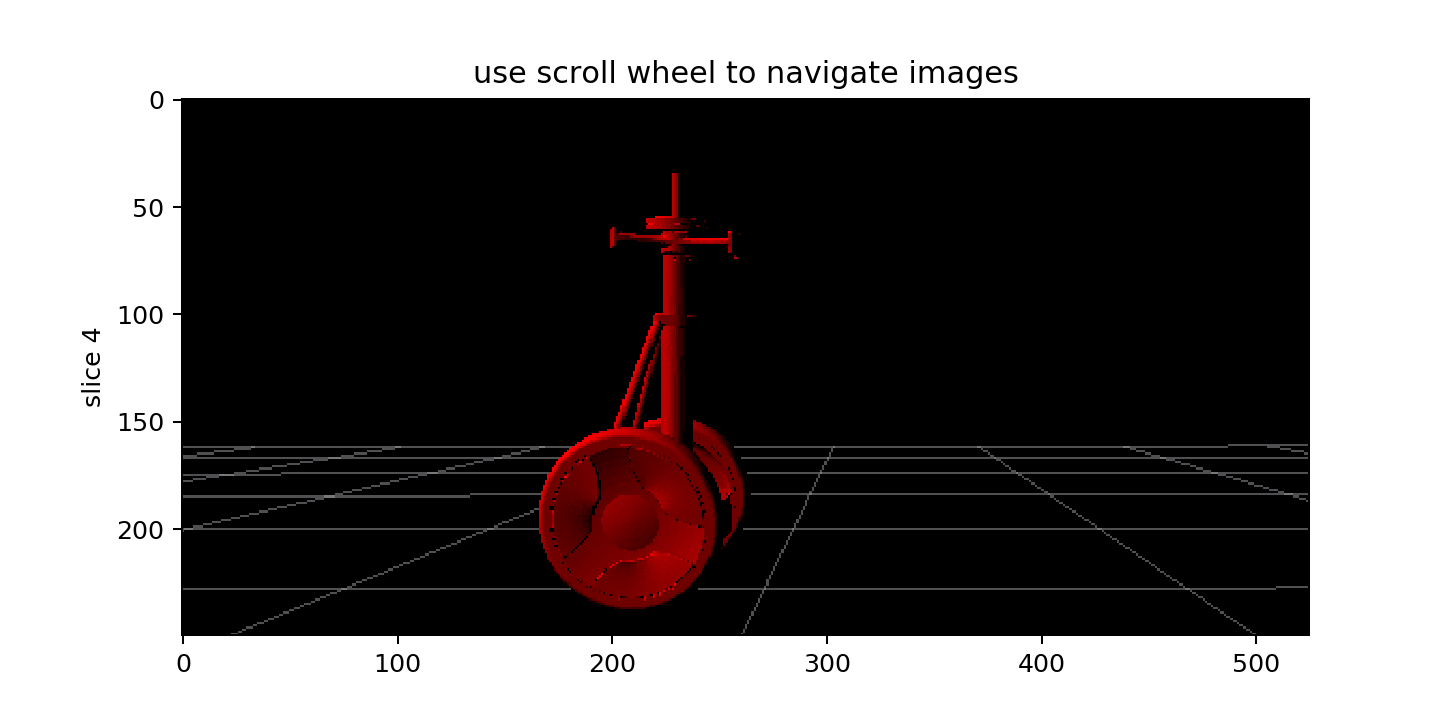

In [158]:
fig, ax = plt.subplots(1, 1, figsize=[8,4])
tracker = IndexTracker(ax, data['image'])


fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

<IPython.core.display.Javascript object>


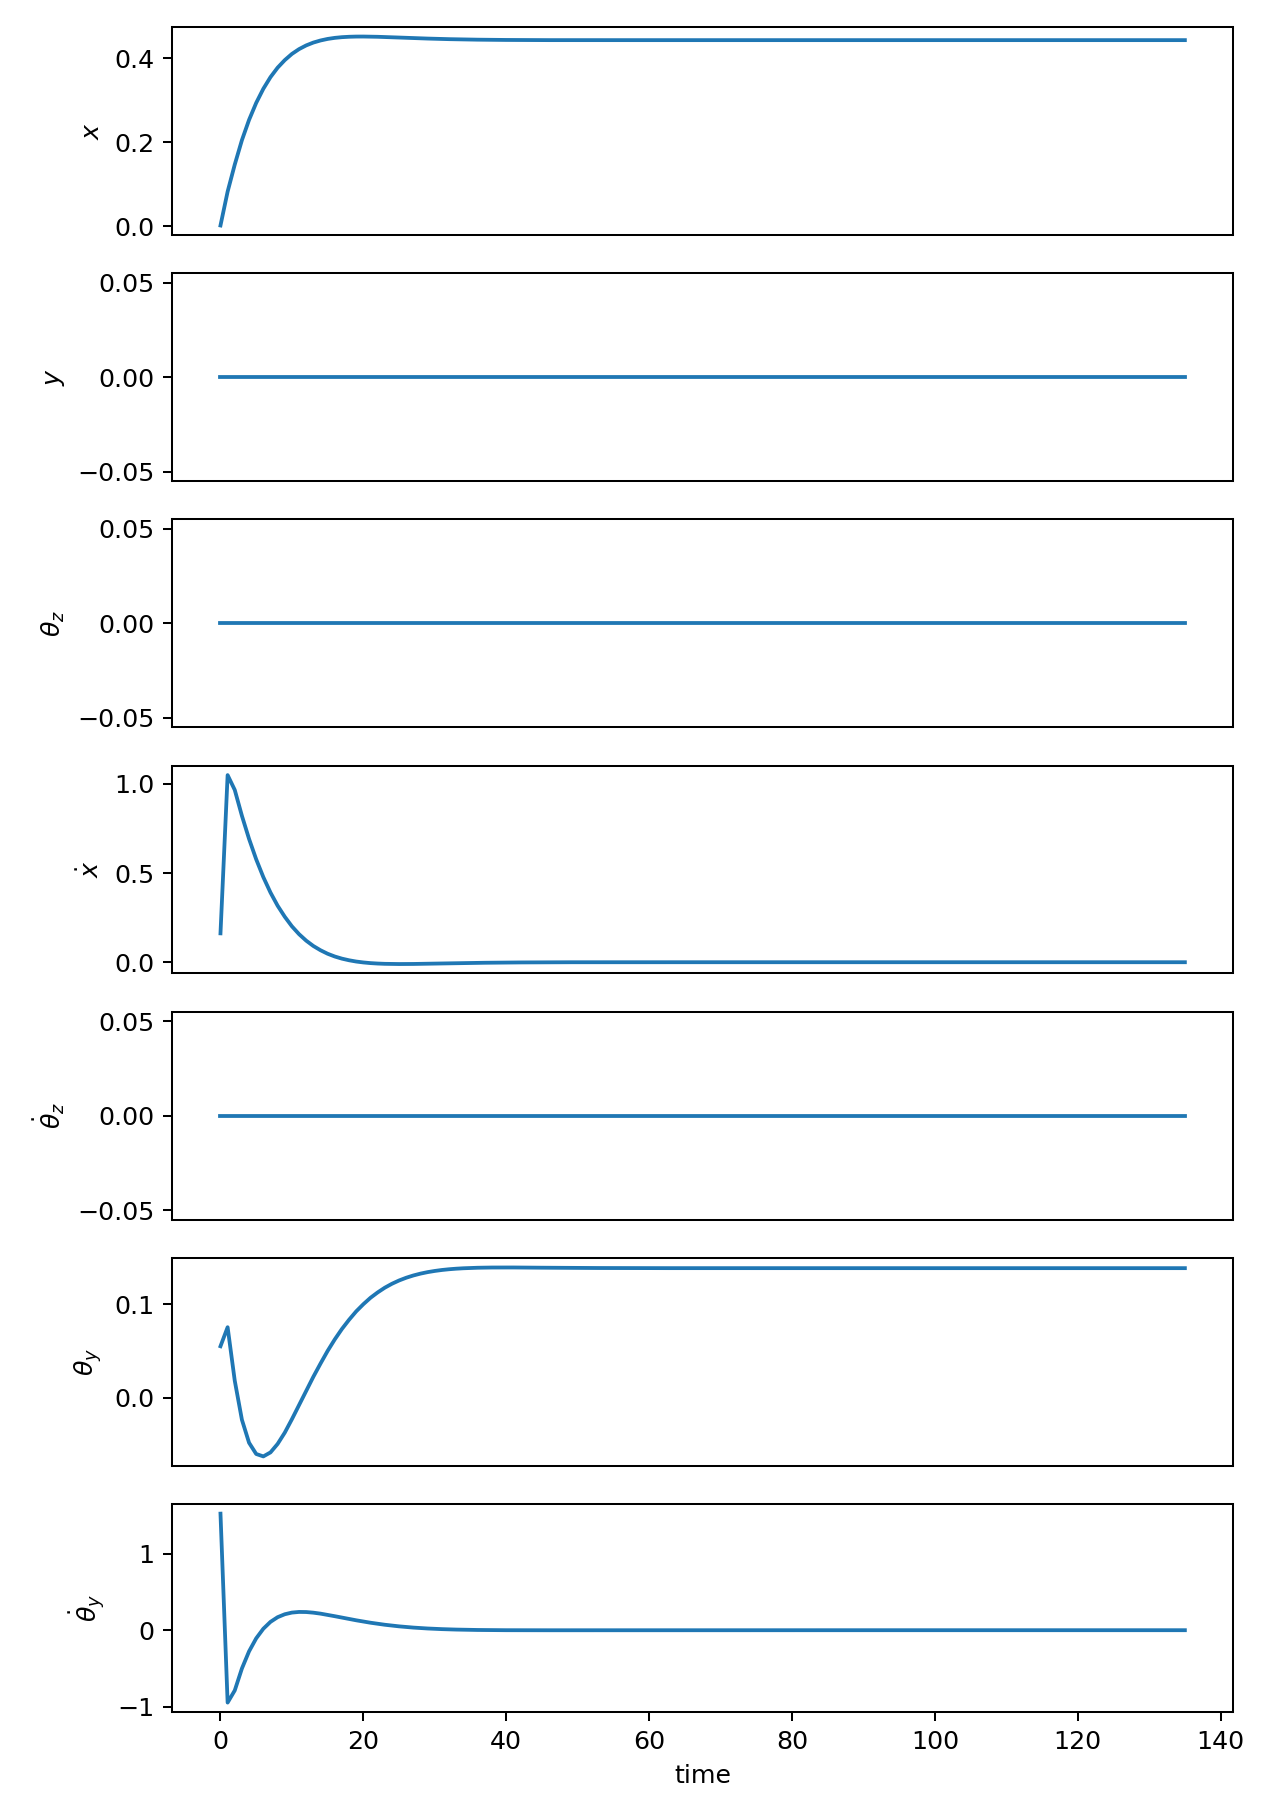

In [188]:
fig, axs = plt.subplots(len(state_labels), 1, figsize=[7,10])
for i, label in enumerate(state_labels):
    axs[i].set_ylabel(label)
    axs[i].plot(states[:,i])
    if i < len(state_labels) - 1:
        axs[i].get_xaxis().set_visible(False)
    else:
        axs[i].set_xlabel('time')
plt.tight_layout()